# Test 6.0

## Theory Question

Que 1-> How does ResNet solve the problem of network degradation?

Que 2-> What does "freezing the layer" mean in the context of transfer learning?

Ans 1-> ResNet solves the problem using skip connections. These skip connections allow the network to skip certain layers and directly go to deep layers. It also solves the problem of vanishing gradient.

Ans 2-> Freezing a layer refers to disabling the training of specific layers in a pre-trained neural network. When you freeze a layer, its weights and biases remain fixed during training, preventing any further updates.

## Practicle Question

- Load the chess dataset
    

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Step by Step instruction

#### Step 1: Load and Prepare the Dataset using ImageDataGenerator

    Task:
        - Load the Chessman Image Dataset from the specified directory using ImageDataGenerator. Specify the path to the dataset directory.
        - Create instances of ImageDataGenerator for training and validation, including data augmentation techniques.

        -  Generate batches of augmented image data for training and validation
            train_generator = train_datagen.flow_from_directory(
                train_data_dir,
                target_size=(224, 224),  # Adjust according to your model's input shape
                batch_size=32,
                class_mode='categorical',
                subset='Traning'
                )

            validation_generator = valid_datagen.flow_from_directory(
                valid_data_dir,
                target_size=(224, 224),  # Adjust according to your model's input shape
                batch_size=32,
                class_mode='categorical',
                subset='Validation'
                )
        
#### Step 2: Define the Alexnet Architecture

    Task:
        - Construct a basic Alexnet architecture for image classification.Start with an input layer suitable for your dataset dimensions.(use 32  kernel filters only on each layer)
        - Stack convolutional layers (Conv2D) followed by pooling layers (MaxPooling2D).
        - Add fully connected layers (Dense) at the end with appropriate activation functions.

#### Step 3: Compile the Model

    Task:
        - Compile the ALexnet model for training.
        - Choose an appropriate optimizer (e.g., Adam).
        - Specify a loss function (e.g., categorical crossentropy) suitable for multi-class classification.
        - Add metrics to monitor during training (e.g., accuracy).

#### Step 4: Train the Model

    Task:
        - Train the Alexnet model using the training data prepared with ImageDataGenerator.
        - Fit the model using model.fit method, passing the training generator.
        - Specify number of epochs and batch size based on computational resources and dataset size.

#### Step 5: Evaluate the Model

    Task:
        - Evaluate the trained model on the validation data.
        - Use model.evaluate to calculate the model's performance metrics on unseen data.
        - Analyze metrics such as accuracy to assess model performance.

#### Step 6: Plot Training and Testing Loss
#### Step 7: Save the model in .h5 extension
#### Step 8: Load the model
#### Step 9: Test the model
    

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_dir = '/content/drive/MyDrive/Chess Dataset'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

valid_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = valid_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 442 images belonging to 6 classes.
Found 109 images belonging to 6 classes.


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=32, input_shape=(224, 224, 3), kernel_size=(11, 11), strides=(4, 4), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))

# 2nd Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))

# 3rd, 4th, and 5th Convolutional Layers
model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))

# Flatten the layers
model.add(Flatten())

# Fully Connected Layers
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(train_generator.num_classes, activation='softmax'))


In [4]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
# Fit the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)

Epoch 1/10
13/13 [==============================] - 129s 10s/step - loss: 1.8263 - accuracy: 0.1415 - val_loss: 1.7865 - val_accuracy: 0.2188
Epoch 2/10
13/13 [==============================] - 29s 2s/step - loss: 1.7888 - accuracy: 0.1976 - val_loss: 1.7712 - val_accuracy: 0.2083
Epoch 3/10
13/13 [==============================] - 28s 2s/step - loss: 1.7798 - accuracy: 0.1878 - val_loss: 1.7796 - val_accuracy: 0.1979
Epoch 4/10
13/13 [==============================] - 27s 2s/step - loss: 1.7832 - accuracy: 0.2049 - val_loss: 1.7800 - val_accuracy: 0.1979
Epoch 5/10
13/13 [==============================] - 27s 2s/step - loss: 1.7867 - accuracy: 0.1878 - val_loss: 1.7815 - val_accuracy: 0.1875
Epoch 6/10
13/13 [==============================] - 27s 2s/step - loss: 1.7833 - accuracy: 0.1829 - val_loss: 1.7799 - val_accuracy: 0.1667
Epoch 7/10
13/13 [==============================] - 28s 2s/step - loss: 1.7843 - accuracy: 0.1902 - val_loss: 1.7836 - val_accuracy: 0.1771
Epoch 8/10
13/13 [

In [6]:
val_loss, val_acc = model.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f"Validation Accuracy: {val_acc}")

3/3 [==============================] - 6s 1s/step - loss: 1.7721 - accuracy: 0.1875
Validation Accuracy: 0.1875


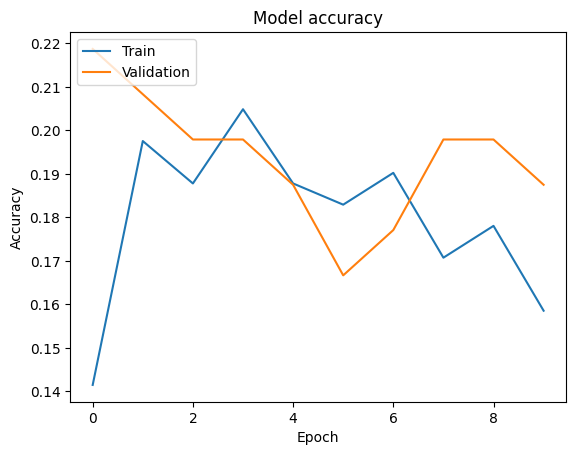

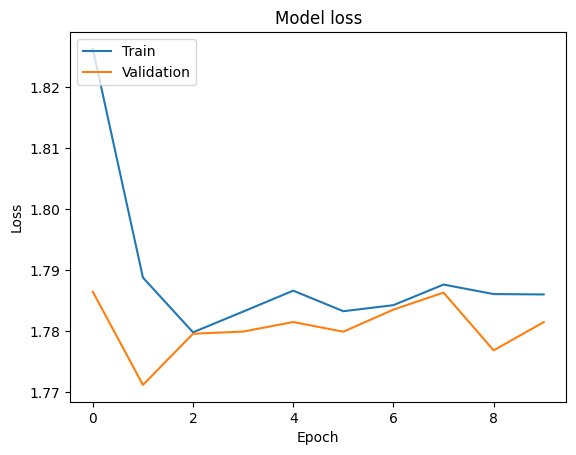

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [8]:
model.save('ayus_chess.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [10]:
from tensorflow.keras.models import load_model

loaded_model = load_model('ayus_chess.h5')
test_loss, test_acc = loaded_model.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f"Test Accuracy: {test_acc}")

3/3 [==============================] - 4s 957ms/step - loss: 1.7813 - accuracy: 0.1771
Test Accuracy: 0.1770833283662796


In [ ]:
#AI/ML Trainer - Saurav
#Date 14 June 2024
#Time - 12:20